# Algorithm of gradient descent


In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Constants specified by the task condition

In [20]:
a, b, c, eta, sigma = 0.1, 0.7, 0.6, 1.1, 0.5
r = np.array([[a], 
              [b]])
R = np.array([[1, c],
             [c, 1]])

### Cost function
Create functions to determine the values of the cost function and its differential at each step:
1. $E\left( w \right)=\frac{1}{2}{{\sigma }^{2}}-r_{xd}^{T}w+\frac{1}{2}{{w}^{T}}{{R}_{x}}w$

2. $\frac{\partial }{\partial w}E\left( w \right)=-{{r}_{xd}}+{{R}_{x}}w$

In [53]:
def E(x, y):
    w = np.array([[x], 
                [y]])
    return (0.5*sigma - np.dot(r.T, w) + 0.5 * np.dot(np.dot(w.T, R), w))[0, 0]

def dEdw(w):
    return -r + np.dot(R, w)

We will also adjust the weight vector at each step using the formula:

${w_{n}}={w_{n-1}}-\eta \cdot \frac{\partial E\left(w_{n-1} \right)}{\partial w_{n-1}}$

In [34]:
def gradientStep(w, eta):
    next_w = w - eta * dEdw(w)
    return next_w

### Gradient descent 

In [56]:
def gradientDescent(start_w=[-5, -5], eta=1.1, eps=0.00001, max_iter=1000):
    
    x = y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([E(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(100, 100)

    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 200, cmap='summer')
    ax.view_init(45, 15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    start_str = f"w[0] = [{start_w[0]}, {start_w[1]}]"
    stop_str = f"w[opt] not found"

    w = np.array(start_w)[:, np.newaxis]
    for n in range(max_iter):
        
        next_w = gradientStep(w, eta)
        coordinates = np.concatenate([w, next_w], axis=1)
        X = coordinates[0, :]
        Y = coordinates[1, :]
        Z = np.array([E(x, y) for x, y in zip(X, Y)])
    
        ax.plot3D(X, Y, Z, c='red')

        if np.all(np.abs(dEdw(next_w)) < eps):
            stop_str = f"w[opt] = [{next_w[0, 0].round(3)}, {next_w[1, 0].round(3)}]"
            ax.scatter(X[1], Y[1], Z[1], c='black')
            break
    
        w = next_w

    iter_str = f"iter = {n+1}"

    print(start_str)
    print(stop_str)
    print(iter_str)

An example of the convergence of the gradient descent algorithm at the learning rate $\eta = 1.1$:

w[0] = [-5, -5]
w[opt] = [-0.5, 1.0]
iter = 50


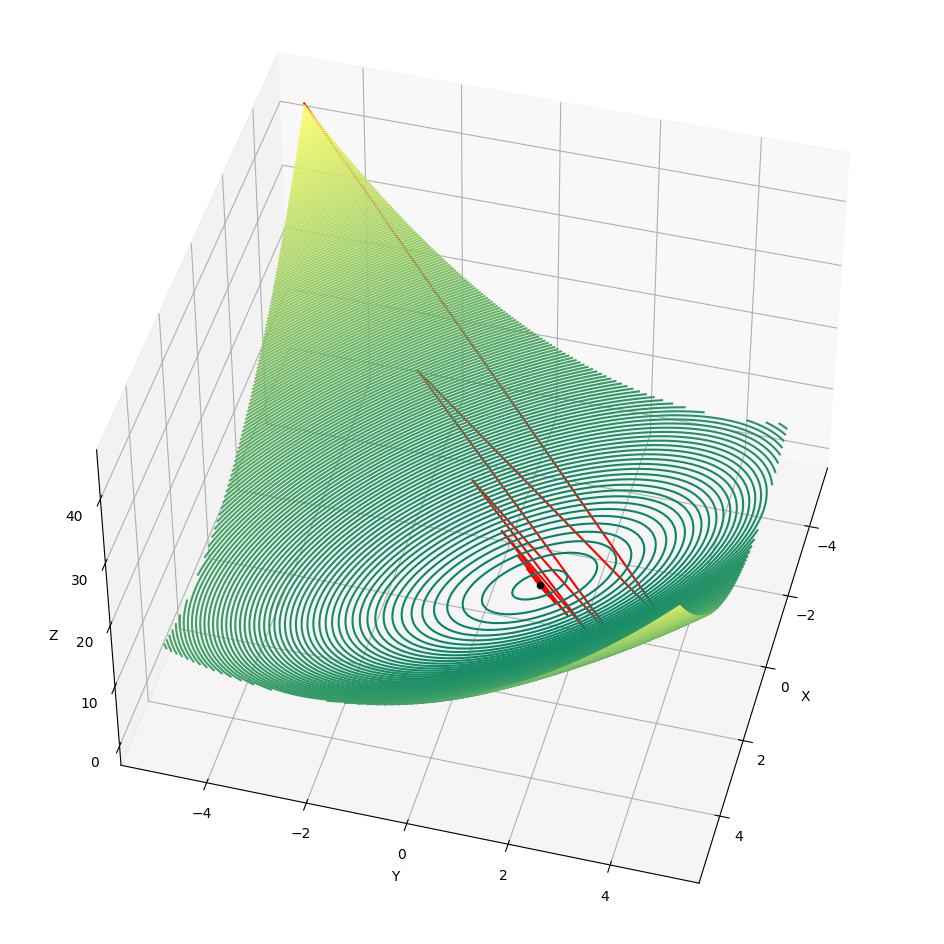

In [57]:
gradientDescent()

An example of the convergence of the gradient descent algorithm at the learning rate $\eta = 0.5$:

w[0] = [-5, -5]
w[opt] = [-0.5, 1.0]
iter = 47


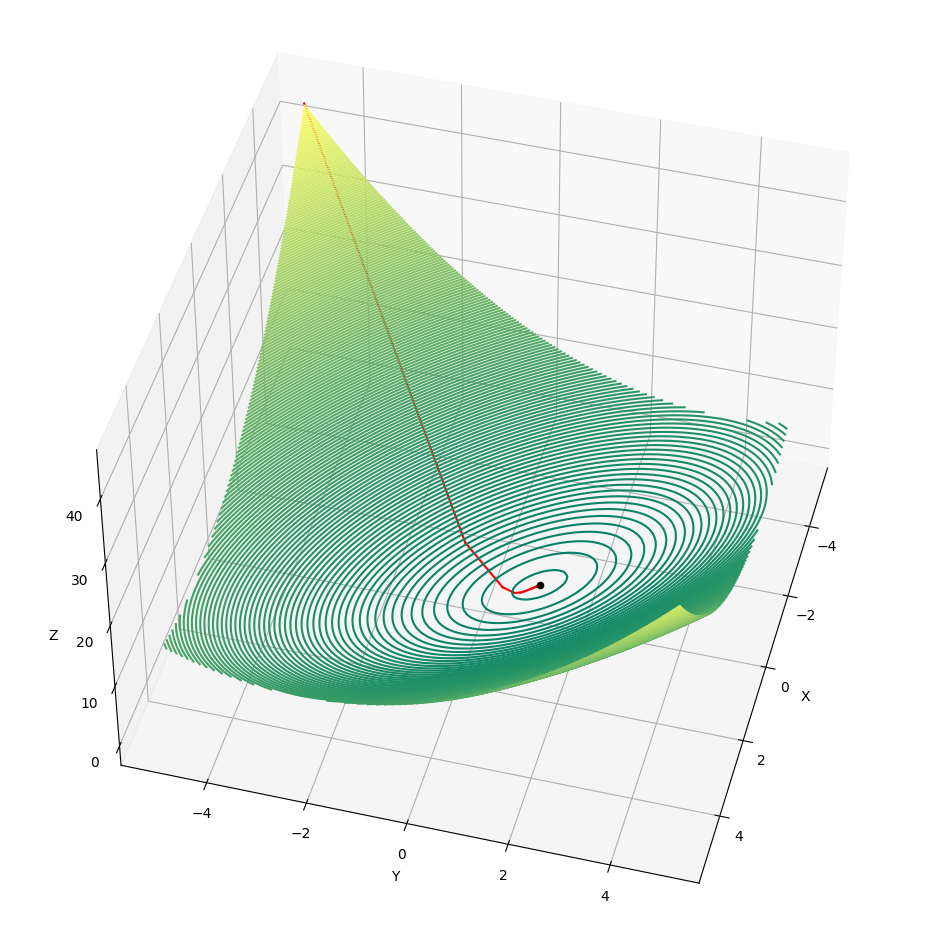

In [63]:
gradientDescent(eta = 0.5)

An example of a divergence of the gradient descent algorithm at the learning rate $\eta = 1.3$:

w[0] = [-5, -5]
w[opt] not found
iter = 1000


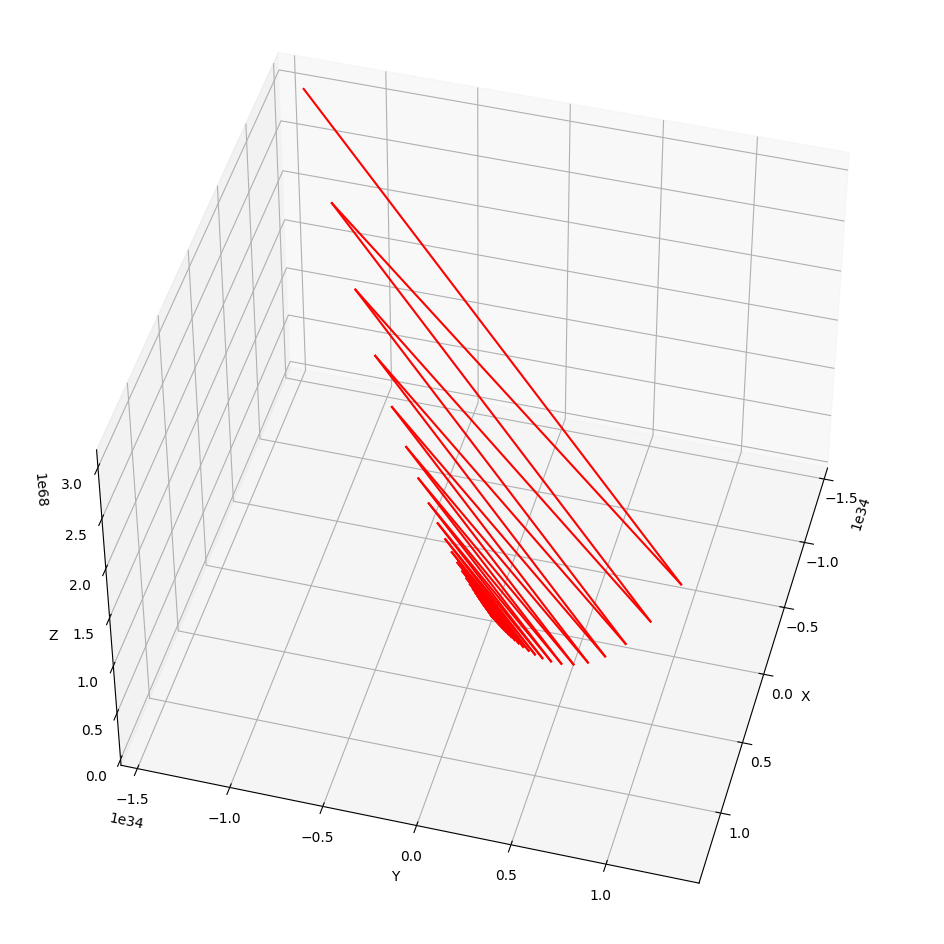

In [64]:
gradientDescent(eta = 1.3)